In [3]:
import numpy as np
import matplotlib as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

# Fuel assembly (FA) representative of average core conditions
P_FA = 6.641 #[MW] Fuel assembly thermal power
N_FP = 284 #[pin] Number of fuel pins in the fuel assembly
q_l0 = 26.03 #[kW/m] Linear heat rate at fuel midplane, q'(0)
P_FP = P_FA/N_FP #[MW/pin] Average thermal power per fuel pin
H_act = 1100 #[mm] Active length

# Define constants
int_q_l = (P_FP*1000)/2 #[kW] Integral from z=0 to z=H_act/2 + H_ext is equal to the half of average power of 1 fuel pin
print(int_q_l)

# Define the function q_l(z)
def q_l(z, H_ext):
    return q_l0 * np.cos(np.pi * z / H_ext)

# Generate multiple values of H_ext for different n
def calculate_H_ext(H_act, n_values):
    H_ext_values = []
    for n in n_values:
        H_ext = H_act / (2 * n + 1)
        H_ext_values.append(H_ext)
    return H_ext_values

# Define the function to compute the integral for a given H_ext
def compute_integral(H_ext):
    # Perform the integral of q_l from 0 to (H_act/2 + H_ext)
    result, _ = quad(q_l, 0, H_act/2 + H_ext, args=(H_ext,))
    return result

# Define the range of n values to check (n = 0, 1, 2, 3, ...)
n_values = range(0,10)  # You can adjust the number of solutions by changing this range

# Calculate the corresponding H_ext values
H_ext_values = calculate_H_ext(H_act, n_values)

# Iterate through each H_ext and check if it satisfies the integral condition
for n, H_ext in zip(n_values, H_ext_values):
    integral_value = compute_integral(H_ext)
    print(f"n={n}, H_ext={H_ext:.2f}, Integral={integral_value:.2f}")

    # Check if the integral value matches the target integral
    if np.isclose(integral_value, int_q_l, atol=0.01):
        print(f"Found the correct H_ext: {H_ext} for n={n}")
        break

11.691901408450704
n=0, H_ext=1100.00, Integral=-9114.17
n=1, H_ext=366.67, Integral=3038.06
n=2, H_ext=220.00, Integral=-1822.83
n=3, H_ext=157.14, Integral=1302.02
n=4, H_ext=122.22, Integral=-1012.69
n=5, H_ext=100.00, Integral=828.56
n=6, H_ext=84.62, Integral=-701.09
n=7, H_ext=73.33, Integral=607.61
n=8, H_ext=64.71, Integral=-536.13
n=9, H_ext=57.89, Integral=479.69


# Alternative solution

$$\begin{equation}
\frac{q'(0)}{L_a}\frac{L_e}{\pi}2\sin\bigg(\frac{\pi L_a}{2 L_e}\bigg)=q'_{avg}
\end{equation}$$
where:
$$\begin{equation}
\begin{cases}
q'(0)=26\frac{kW}{m}\\
q'_{avg}=21\frac{kW}{m}\\
L_a=1.1m
\end{cases}
\end{equation}$$
solution by graphical method

In [2]:
import matplotlib.pyplot as plt
import sympy as smp
from sympy.plotting import plot
from sympy.plotting import (plot, plot_parametric)
from fractions import Fraction
import numpy as np

Rearranging the governing equation:
$$\begin{equation}
\frac{H_e}{\pi}2\sin\bigg(\frac{\pi L_a}{2 L_e}\bigg)=\frac{q'_{avg}}{q'(0)}\cdot H_a
\end{equation}$$

In [3]:
He,pi,Ha,z=smp.symbols(r'H_e,\pi,H_a,z')
display(smp.Eq(He/pi*2*smp.sin(pi*Ha/(2*He))-(21/26*1.1),0))

Eq(2*H_e*sin(H_a*\pi/(2*H_e))/\pi - 0.888461538461539, 0)

Eq(sin(1.72787595947439/H_e), 1.39488461538462/H_e)

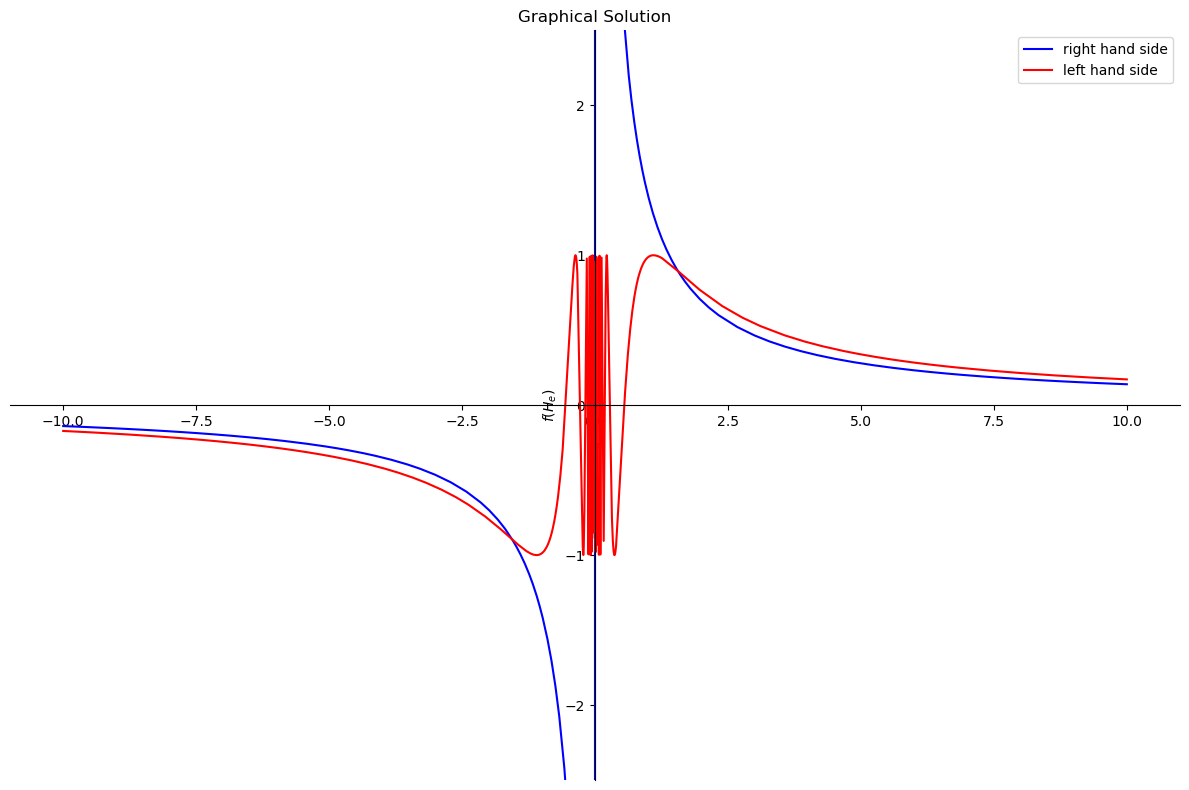

In [4]:
G=smp.Eq(smp.sin(np.pi*1.1/(2*He)),(21/26*1.1)*3.14/(2*He))
display(G) #plot dell'equazione da risolvere

plt.rcParams['figure.figsize'] =12,8
I0 = plot(G.rhs,ylim=(-2.5,+2.5),title="Graphical Solution",line_color="blue",label='right hand side',legend=True,show=False)
I1=plot(G.lhs,ylim=(-2.5,+2.5),title="Graphical Solution",line_color="red",label='left hand side',legend=True,show=False)
I0.append(I1[0])
I0.show()

In [6]:
H=smp.nsolve(G.lhs-G.rhs,He,1)
print(H,'m')

1.55813836929158 m
